In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import matplotlib.dates as dates

In [2]:
data = pd.read_csv('../../../data/kc_house_data_update2.csv')

<AxesSubplot:xlabel='month', ylabel='price'>

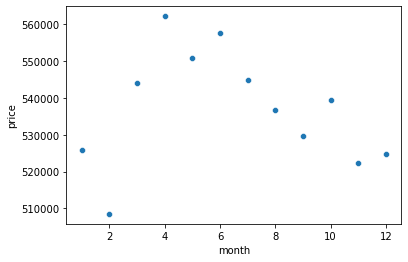

In [3]:
data['month'] = data['date'].map(lambda x: int(x[:2]))
calendar = data.groupby('month')['price'].mean()
sns.scatterplot(data=calendar)

In [4]:
dates.date2num(datetime.datetime.strptime('5/15/2014','%m/%d/%Y'))

16205.0

In [5]:
16205, 16205+365/2, 16205+365

(16205, 16387.5, 16570)

In [6]:
data['seasonal'] = np.cos(2*np.pi*(data['datefloat']-16205)/365)

In [7]:
data['month'] = data['date'].map(lambda x: int(x[:2]))
months = pd.get_dummies(data['month'], prefix = 'month')
data.drop('month', axis = 1, inplace = True)
data = pd.concat([data, months], axis = 1)

In [8]:
data.to_csv(path_or_buf = '../../../data/kc_house_data_update3.csv', index = False)